In [66]:
import matplotlib.pyplot as plt

%matplotlib inline

In [67]:
import numpy as np
import healpy as hp

In [68]:
NSIDE = 32
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 32 is 1.8 deg


In [69]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

12288


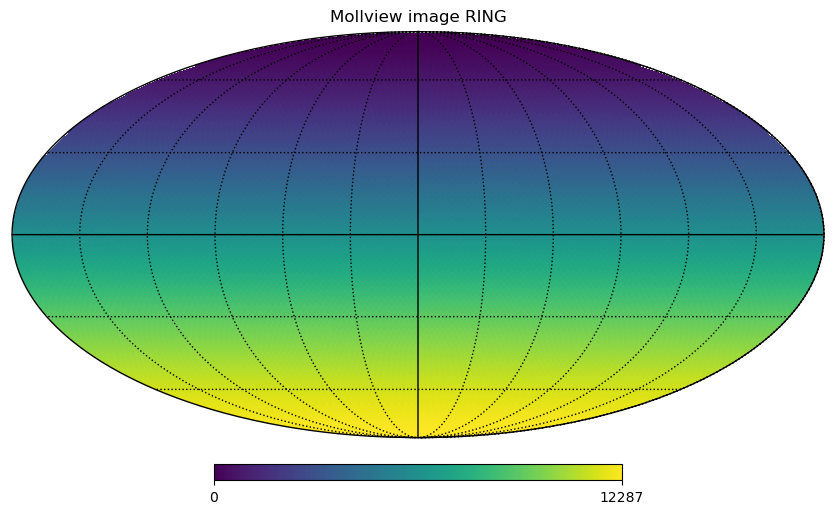

In [70]:
m = np.arange(NPIX)
hp.mollview(m, title="Mollview image RING")
hp.graticule()

In [71]:
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
print(vec)

[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


In [72]:
ipix_disc = hp.query_disc(nside=32, vec=vec, radius=np.radians(10))

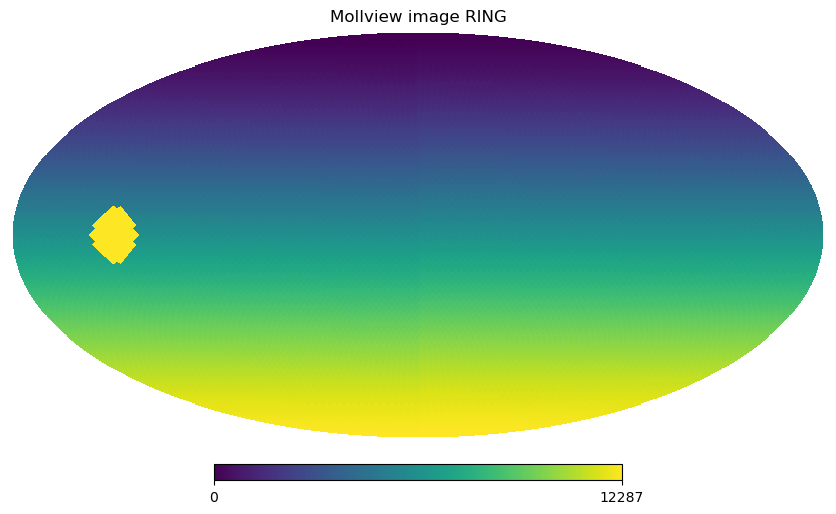

In [73]:
m = np.arange(NPIX)
m[ipix_disc] = m.max()
hp.mollview(m, title="Mollview image RING")

In [74]:
theta, phi = np.degrees(hp.pix2ang(nside=32, ipix=[0, 1, 2, 3, 4]))

In [75]:
theta

array([1.46197116, 1.46197116, 1.46197116, 1.46197116, 2.92418036])

In [76]:
phi

array([ 45. , 135. , 225. , 315. ,  22.5])

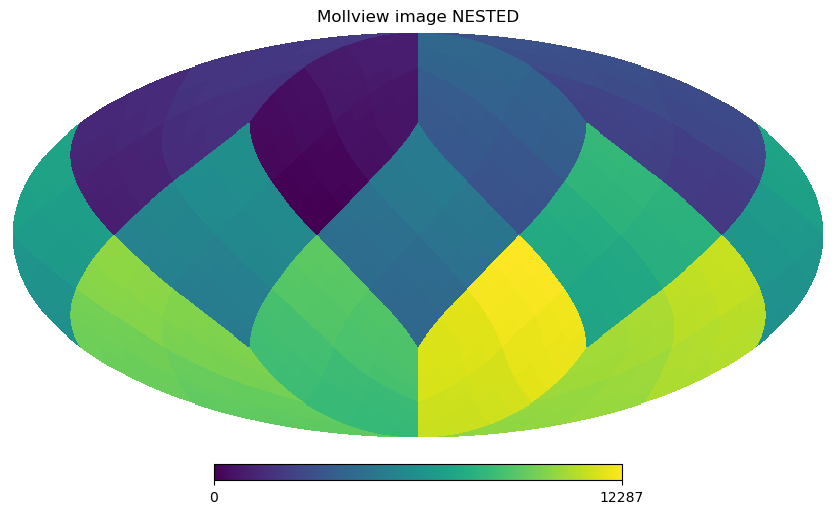

In [77]:
m = np.arange(NPIX)
hp.mollview(m, nest=True, title="Mollview image NESTED")

In [78]:
!wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits;wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/ancillary/masks/wmap_temperature_analysis_mask_r9_7yr_v4.fits


URL transformed to HTTPS due to an HSTS policy
--2022-10-20 17:55:22--  https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 129.164.179.68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

URL transformed to HTTPS due to an HSTS policy
--2022-10-20 17:55:22--  https://lambda.gsfc.nasa.gov/data/map/dr4/ancillary/masks/wmap_temperature_analysis_mask_r9_7yr_v4.fits
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 129.164.179.68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [79]:
wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits")

In [80]:
hp.write_map("my_map.fits", wmap_map_I, overwrite=True)

setting the output map dtype to [dtype('>f4')]


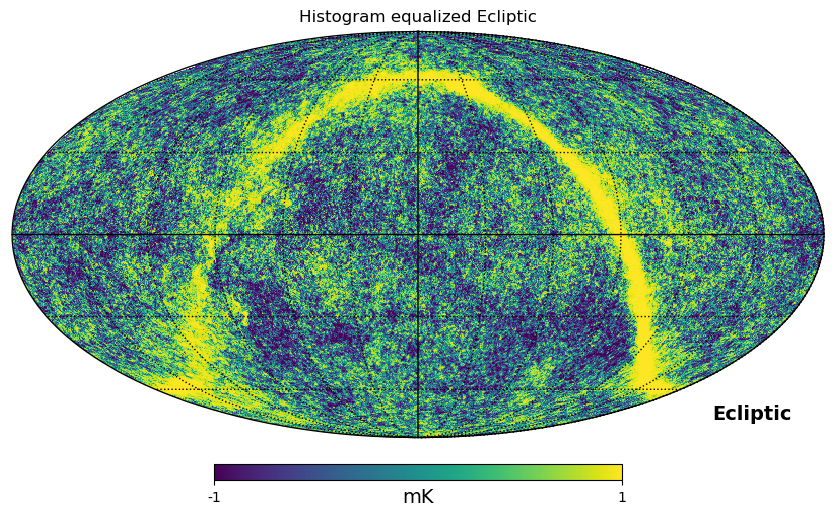

In [81]:
hp.mollview(
    wmap_map_I,
    coord=["G", "E"],
    title="Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
    min=-1,
    max=1,
)
hp.graticule()

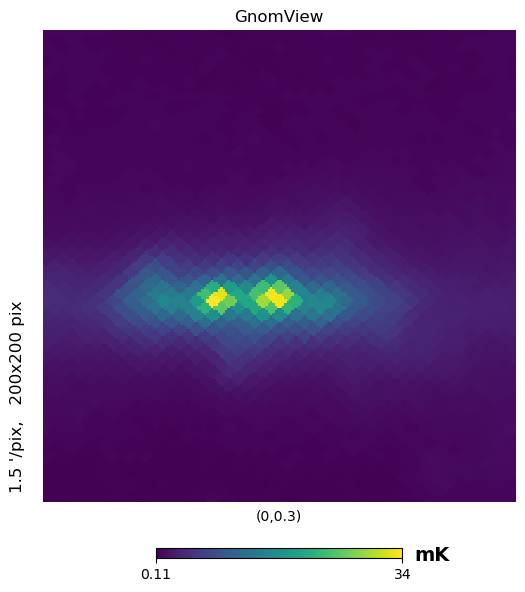

In [82]:
hp.gnomview(wmap_map_I, rot=[0, 0.3], title="GnomView", unit="mK", format="%.2g")

In [83]:
mask = hp.read_map("wmap_temperature_analysis_mask_r9_7yr_v4.fits").astype(np.bool_)
wmap_map_I_masked = hp.ma(wmap_map_I)
wmap_map_I_masked.mask = np.logical_not(mask)

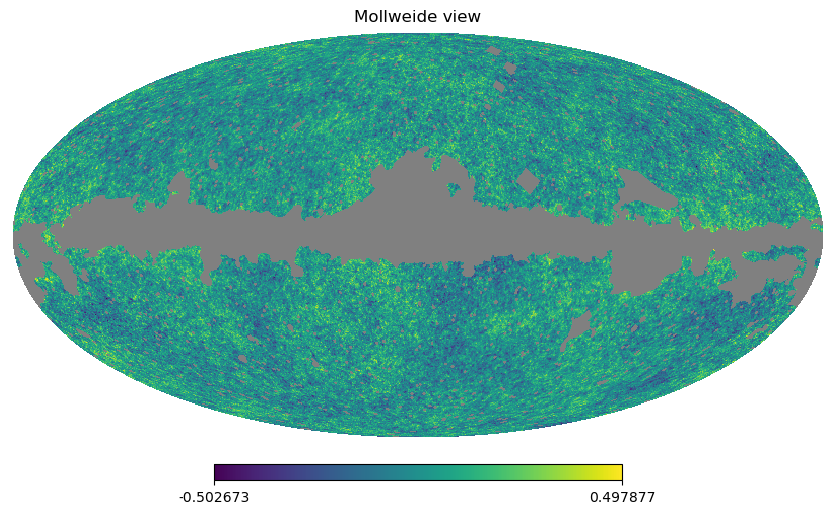

In [84]:
hp.mollview(wmap_map_I_masked.filled())

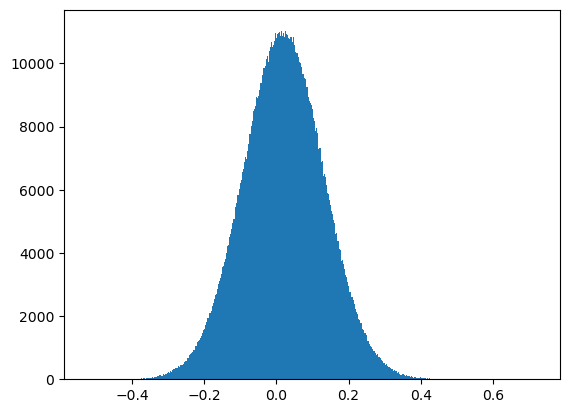

In [85]:
plt.hist(wmap_map_I_masked.compressed(), bins=1000);

In [86]:
LMAX = 1024
cl = hp.anafast(wmap_map_I_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))

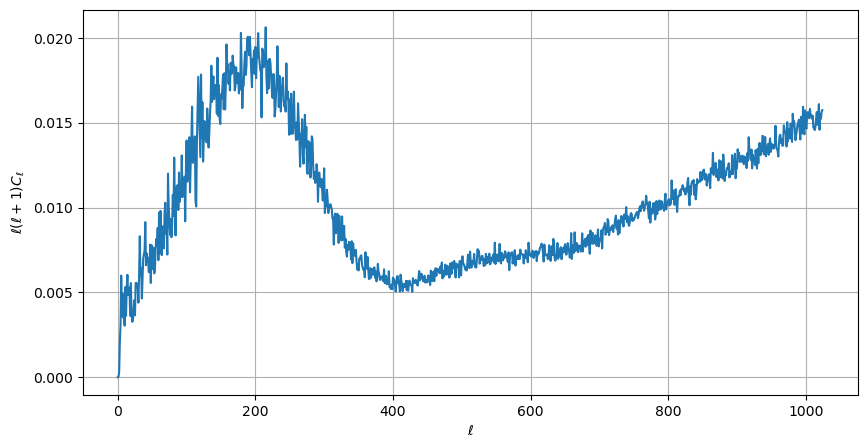

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)

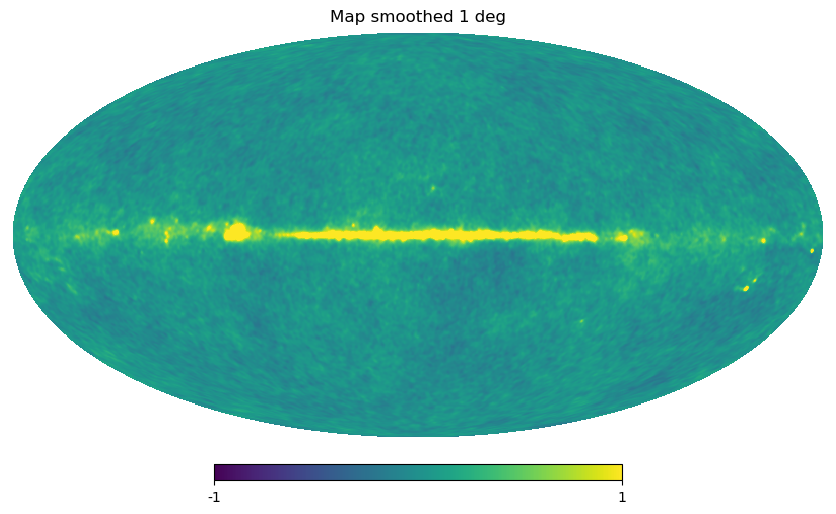

In [88]:
wmap_map_I_smoothed = hp.smoothing(wmap_map_I, fwhm=np.radians(1.))
hp.mollview(wmap_map_I_smoothed, min=-1, max=1, title="Map smoothed 1 deg")